In [14]:
import tensorflow as tf
from __future__ import print_function
import numpy as np

In [15]:
def euclideanDistance(x, z):
    '''
    We vectorized the operation with matrix operations
    the ||x - z ||^2 is = Sum(x - z)^2 = Sum from 1 to D
    of (x^2 - 2xz + z^2)
    
    x^2 = x^T times x
    z^2 = z^T times z
    we can find the sum of each row by using the reduce sum function
    
    sum of -2xz 
    we can use matrix multiplication, x times z^T to obtain xz,
    then multiply by -2
    '''
    n1 = x.shape[0]
    n2 = z.shape[0]    
    
    x_squared = tf.square(x)
    z_squared = tf.square(z) #tf.matmul(z ,tf.transpose(z))

    x_2_sum = tf.reduce_sum(x_squared, 1)
    z_2_sum = tf.reduce_sum(z_squared, 1)
    
    x_2_sum = tf.transpose(x_2_sum)
    z_2_sum = tf.transpose(z_2_sum)

    
    xz = tf.matmul(x, tf.transpose(z))
    minus_2xz = tf.scalar_mul(-2, xz)

 
    x_2_tile =tf.tile(tf.expand_dims(x_2_sum, 1), [1, n2])
    z_2_tile = tf.tile(tf.expand_dims(z_2_sum ,1), [1, n1])
    z_2_tile_T = tf.transpose(z_2_tile)

    result = x_2_tile + minus_2xz +z_2_tile_T
    
    return result

In [16]:
#given starter code
import numpy as np
import matplotlib.pyplot as plt

# my code part1 responsibility
def nearestIndices(_dist_mat, _k):

    nearest_k_data, nearest_k_indices = tf.nn.top_k(tf.negative(_dist_mat), _k)
    return nearest_k_data, nearest_k_indices


def pairDist(_data, _data1):
    data_t = tf.convert_to_tensor(_data)
    data1_t = tf.convert_to_tensor(_data1)
    dist = euclideanDistance(data_t, data1_t)
    return dist
  

def knn(_trainData, _trainTarget, _new_data, _k):
    '''
    KNN using responsibility
    '''
    #nearest indices
    dist_mat = pairDist( _new_data, _trainData )    
    nearest_k, nearest_k_idx = nearestIndices(dist_mat, _k)
    predict_res = tf.reduce_mean(tf.gather(_trainTarget, nearest_k_idx), 1)
    return predict_res


def plotResult(_trainData, _trainTarget):
    X = np.linspace(0.0, 11.0, num = 100)[:, np.newaxis]
    xTensor = tf.stack(X)
    
    num_neighbour_list = [1, 3, 5, 50]
    for j in num_neighbour_list:
        print("plot result")
        dist_mat = pairDist( X, _trainData ) 
        nearest_k, nearest_k_idx = nearestIndices(dist_mat, j)
        predict_res = tf.reduce_mean(tf.gather(_trainTarget, nearest_k_idx), 1)

        plt.figure()
        #plt.scatter(sessMain.run(_trainData), sessMain.run(_trainTarget))
        plt.scatter(_trainData.eval(), _trainTarget.eval())

        plt.title("K = " + str(j))
        plt.plot(xTensor.eval(), predict_res.eval())
        
        fileName = str("KNN") + str(j) + str("trainingGraph.png")
        plt.savefig(fileName)

def testKValuesKNN(trainData, trainTarget, testData, testTarget):
    num_neighbour_list = [1, 3, 5, 50]
    loss_list = []

    for j in num_neighbour_list:
        y_hat = knn(trainData, trainTarget, testData,  j)      
        mse_mat = tf.square(tf.subtract(y_hat, testTarget))
        loss = tf.reduce_mean(mse_mat)/2.0
        print("q1 neighbour = " ,j)
        loss_list.append(loss.eval())
    return loss_list

def q1():
    np.random.seed(521)
    Data = np.linspace(1.0 , 10.0 , num =100) [:, np. newaxis]
    Target = np.sin( Data ) + 0.1 * np.power( Data , 2) \
         + 0.5 * np.random.randn(100 , 1)
    randIdx = np.arange(100)
    np.random.shuffle(randIdx)
    trainData, trainTarget  = Data[randIdx[:80]], Target[randIdx[:80]]
    validData, validTarget = Data[randIdx[80:90]], Target[randIdx[80:90]]
    testData, testTarget = Data[randIdx[90:100]], Target[randIdx[90:100]]

    # convert numpy array to tensors
    trainData = tf.stack(trainData)
    trainTarget = tf.stack(trainTarget)
    testData = tf.stack(testData)
    testTarget = tf.stack(testTarget)
    validData = tf.stack(validData)
    validtarget = tf.stack(validTarget)
    
    print("********** BEGIN Q1 ***********")
    
    plotResult(trainData, trainTarget)
    
    loss_test = testKValuesKNN(trainData, trainTarget, testData, testTarget)
    print("q1 loss_test", loss_test)
    
    loss_train = testKValuesKNN(trainData, trainTarget, trainData, trainTarget)
    print("q1 loss_train" , loss_train)
    
    loss_valid = testKValuesKNN(trainData, trainTarget, validData, validTarget)
    print("q1 loss_valid", loss_valid)
    print("********** END Q1 ***********")


********** BEGIN Q1 ***********
plot result
plot result
plot result
plot result
q1 neighbour =  1
q1 neighbour =  3
q1 neighbour =  5
q1 neighbour =  50
q1 loss_test [0.12799977712101845, 0.14242504248546536, 0.18633105926605592, 0.70693467047889302]
q1 neighbour =  1
q1 neighbour =  3
q1 neighbour =  5
q1 neighbour =  50
q1 loss_train [0.0, 0.10825207710580038, 0.12183845521874122, 1.2477892734500411]
q1 neighbour =  1
q1 neighbour =  3
q1 neighbour =  5
q1 neighbour =  50
q1 loss_valid [0.28807977607463453, 0.30897640431136369, 0.31043863052707066, 1.2230445257949047]
********** END Q1 ***********


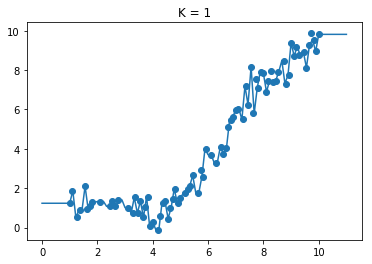

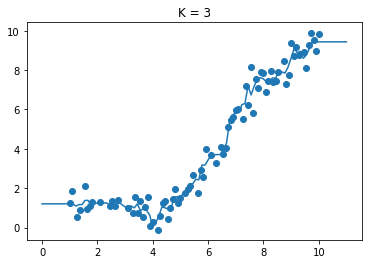

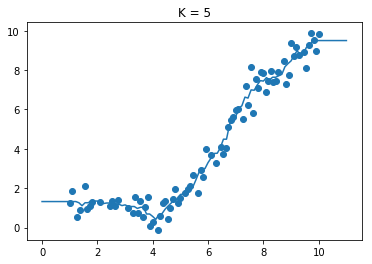

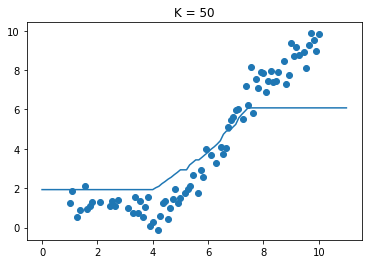

In [17]:
from scipy import spatial as sp
from sklearn import metrics as skm


if __name__ == "__main__":
    
    init = tf.global_variables_initializer()
    sessMain = tf.InteractiveSession()
    sessMain.run(init)
    q1()
